# MPL_Learning

## Import

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

## Model set up 

In [2]:
class Mpl(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2,32)
        self.linear2 = nn.Linear(32,16)
        self.linear3 = nn.Linear(16,1)

    def forward(self,x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = self.linear3(x)
        return x

## Train function

In [3]:
'''
def train(model,optimizer,E,iteration,x,t):
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()
        t_pred = model(x)
        loss = E(t_pred.reshape(t.shape),t)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 100 == 0:
            print('epoch=',i+1,'loss=',loss)
    return model, losses
'''

"\ndef train(model,optimizer,E,iteration,x,t):\n    losses = []\n    for i in range(iteration):\n        optimizer.zero_grad()\n        t_pred = model(x)\n        loss = E(t_pred.reshape(t.shape),t)\n        loss.backward()\n        optimizer.step()\n        losses.append(loss.item())\n        if i % 100 == 0:\n            print('epoch=',i+1,'loss=',loss)\n    return model, losses\n"

## Test function

In [4]:
def test(model,x):
    t_pred = model(x).data.numpy().T[0]
    return t_pred

## Optimizer and Loss function

In [5]:
def cost_function(t_pred,t):
    return 1/2*torch.mean(torch.pow(t_pred-t,2))

In [6]:
def train(model,optimizer,iteration,x,t):
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()
        t_pred = model(x)
        loss = cost_function(t_pred.reshape(t.shape),t)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 100 == 0:
            print('epoch=',i+1,'loss=',loss)
    return model, losses

In [7]:
net = Mpl()
optimizer = optim.RMSprop(net.parameters(), lr=0.01)
E = nn.MSELoss()

## Train data

In [8]:
x = np.random.uniform(0,10,100)
t = np.random.uniform(0.9,1.1,100) * np.sin(2*np.pi*0.1*x)
x = torch.from_numpy(x.astype(np.float32)).float()
t = torch.from_numpy(t.astype(np.float32)).float()
X = torch.stack([torch.ones(100), x],1)

## Test data

In [9]:
x_test = np.linspace(-5,15,60)
x_test = torch.from_numpy(x_test.astype(np.float32)).float()
X_test = torch.stack([torch.ones(60),x_test],1)

## Traning

In [10]:
#net, losses = train(model=net,optimizer=optimizer,E=E,iteration=1000,x=X,t=t)
net, losses = train(model=net,optimizer=optimizer,iteration=1000,x=X,t=t)

epoch= 1 loss= tensor(0.1853, grad_fn=<MulBackward0>)
epoch= 101 loss= tensor(0.0370, grad_fn=<MulBackward0>)
epoch= 201 loss= tensor(0.0372, grad_fn=<MulBackward0>)
epoch= 301 loss= tensor(0.0374, grad_fn=<MulBackward0>)
epoch= 401 loss= tensor(0.0357, grad_fn=<MulBackward0>)
epoch= 501 loss= tensor(0.0323, grad_fn=<MulBackward0>)
epoch= 601 loss= tensor(0.0174, grad_fn=<MulBackward0>)
epoch= 701 loss= tensor(0.0175, grad_fn=<MulBackward0>)
epoch= 801 loss= tensor(0.0165, grad_fn=<MulBackward0>)
epoch= 901 loss= tensor(0.0115, grad_fn=<MulBackward0>)


## Test

In [11]:
t_pred = test(net, X_test)

## Graph

In [12]:
def graph(x, y, x_new, t_pred, losses):
    # ここからグラフ描画-------------------------------------------------
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'Times New Roman'
 
    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
 
    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure(figsize=(9, 4))
    ax1 = fig.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = fig.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
 
    # 軸のラベルを設定する。
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('E')
 
    # スケール設定
    ax1.set_xlim(-5, 15)
    ax1.set_ylim(-2, 2)
    ax2.set_xlim(0, 5000)
    ax2.set_ylim(0.001, 100)
    ax2.set_yscale('log')
 
    # データプロット
    ax1.scatter(x, y, label='dataset')
    ax1.plot(x_new, t_pred, color='red', label='PyTorch regression', marker="o", markersize=3)
    ax2.plot(np.arange(0, len(losses), 1), losses)
    ax2.text(600, 20, 'Training Error=' + str(round(losses[len(losses)-1], 2)), fontsize=16)
    ax2.text(600, 50, 'Iteration=' + str(round(len(losses), 1)), fontsize=16)
 
    # グラフを表示する。
    ax1.legend()
    fig.tight_layout()
    plt.show()
    plt.close()
    # -------------------------------------------------------------------

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


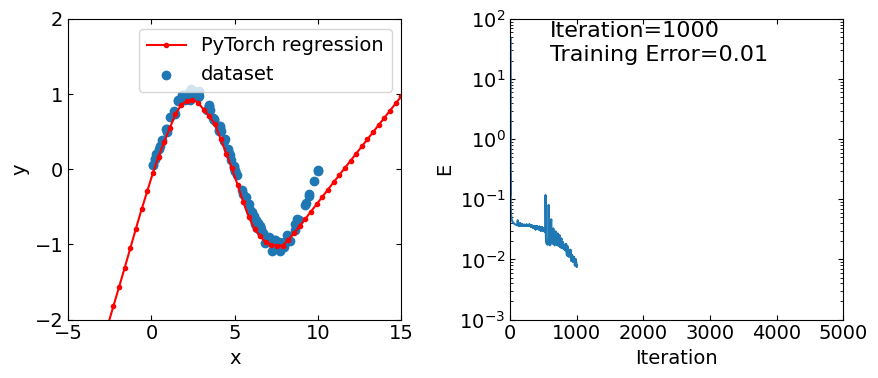

In [13]:
graph(x,t,X_test.data.numpy().T[1],t_pred,losses)